In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
import pickle

# Загрузка и знакомство с данными

In [2]:
df = pd.read_csv("/home/mainuser/lab_project/data/train.csv")
df.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [3]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Оптимизация типов

In [4]:
df['blue'] = df['blue'].astype('category')
df['dual_sim'] = df['dual_sim'].astype('category')
df['four_g'] = df['four_g'].astype('category')
df['three_g'] = df['three_g'].astype('category')
df['touch_screen'] = df['touch_screen'].astype('category')
df['wifi'] = df['wifi'].astype('category')
price_range_cat = pd.api.types.CategoricalDtype(categories=[0,1,2,3],ordered=True)
df['price_range'] = df['price_range'].astype(price_range_cat)

df['battery_power'] = df['battery_power'].astype('int16')
df['mobile_wt'] = df['mobile_wt'].astype('int16')
df['px_height'] = df['px_height'].astype('int16')
df['px_width'] = df['px_width'].astype('int16')
df['ram'] = df['ram'].astype('int16')

df['clock_speed'] = df['clock_speed'].astype('float16')
df['m_dep'] = df['m_dep'].astype('float16')

df['fc'] = df['fc'].astype('int16')
df['int_memory'] = df['int_memory'].astype('int16')
df['n_cores'] = df['n_cores'].astype('int16')
df['pc'] = df['pc'].astype('int16')
df['sc_h'] = df['sc_h'].astype('int16')
df['sc_w'] = df['sc_w'].astype('int16')
df['talk_time'] = df['talk_time'].astype('int16')


Сводные параметры

In [5]:
df.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522461,4.309500,32.046500,0.501953,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000
std,439.418206,0.815918,4.341444,18.145715,0.288330,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955
min,501.000000,0.500000,0.000000,2.000000,0.099976,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000
25%,851.750000,0.700195,1.000000,16.000000,0.199951,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000
75%,1615.250000,2.199219,7.000000,48.000000,0.799805,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000


In [6]:
cat_features = df.select_dtypes(include=['category']).columns.to_list()
cat_features

['blue',
 'dual_sim',
 'four_g',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

In [7]:
num_features = df.select_dtypes(include=['number']).columns.to_list()
num_features

['battery_power',
 'clock_speed',
 'fc',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time']

In [8]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   battery_power  2000 non-null   int16   
 1   blue           2000 non-null   category
 2   clock_speed    2000 non-null   float16 
 3   dual_sim       2000 non-null   category
 4   fc             2000 non-null   int16   
 5   four_g         2000 non-null   category
 6   int_memory     2000 non-null   int16   
 7   m_dep          2000 non-null   float16 
 8   mobile_wt      2000 non-null   int16   
 9   n_cores        2000 non-null   int16   
 10  pc             2000 non-null   int16   
 11  px_height      2000 non-null   int16   
 12  px_width       2000 non-null   int16   
 13  ram            2000 non-null   int16   
 14  sc_h           2000 non-null   int16   
 15  sc_w           2000 non-null   int16   
 16  talk_time      2000 non-null   int16   
 17  three_g        2000 non-null   ca

In [9]:
for cat in cat_features:
    print(f'{cat} - unique count:{df[cat].nunique()}')

blue - unique count:2
dual_sim - unique count:2
four_g - unique count:2
three_g - unique count:2
touch_screen - unique count:2
wifi - unique count:2
price_range - unique count:4


In [10]:
for col in cat_features:
    print(f'{col} - value count:{df[col].value_counts()}')

blue - value count:blue
0    1010
1     990
Name: count, dtype: int64
dual_sim - value count:dual_sim
1    1019
0     981
Name: count, dtype: int64
four_g - value count:four_g
1    1043
0     957
Name: count, dtype: int64
three_g - value count:three_g
1    1523
0     477
Name: count, dtype: int64
touch_screen - value count:touch_screen
1    1006
0     994
Name: count, dtype: int64
wifi - value count:wifi
1    1014
0     986
Name: count, dtype: int64
price_range - value count:price_range
0    500
1    500
2    500
3    500
Name: count, dtype: int64


# Очистка данных

In [11]:
df = df.query('sc_h > 0')
df = df.query('sc_w > 0')
df = df.query('px_height > 0')
df = df.query('px_width > 0')

In [12]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1819 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   battery_power  1819 non-null   int16   
 1   blue           1819 non-null   category
 2   clock_speed    1819 non-null   float16 
 3   dual_sim       1819 non-null   category
 4   fc             1819 non-null   int16   
 5   four_g         1819 non-null   category
 6   int_memory     1819 non-null   int16   
 7   m_dep          1819 non-null   float16 
 8   mobile_wt      1819 non-null   int16   
 9   n_cores        1819 non-null   int16   
 10  pc             1819 non-null   int16   
 11  px_height      1819 non-null   int16   
 12  px_width       1819 non-null   int16   
 13  ram            1819 non-null   int16   
 14  sc_h           1819 non-null   int16   
 15  sc_w           1819 non-null   int16   
 16  talk_time      1819 non-null   int16   
 17  three_g        1819 non-null   categor

# Анализ признаков

## Heatmap

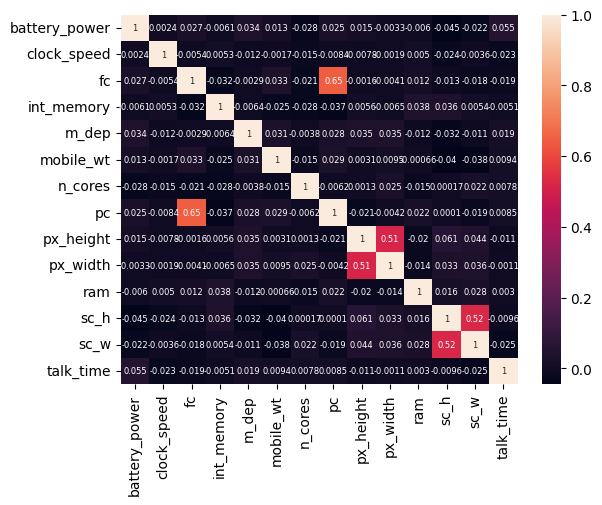

In [13]:
feature_correlation = df[num_features].corr()
ax = sns.heatmap(feature_correlation, annot=True,annot_kws={"size":6})

График демонстрирует взаимную корреляцию числовых признаков для дальнейшего анализа. Можно сделать вывод, что исключительно небольшое количество признаков влияют друг на друга: параметры экрана (высота и ширина) и свойства основной и фронтальной камер. Это указывает на то, что боольшинство экранов использует ограниченный набор разрешений, которые производители стараются поддерживать независимо от размеров монитора в целом, и что модули камер прогрессируют параллельно между моделями.

## Displot

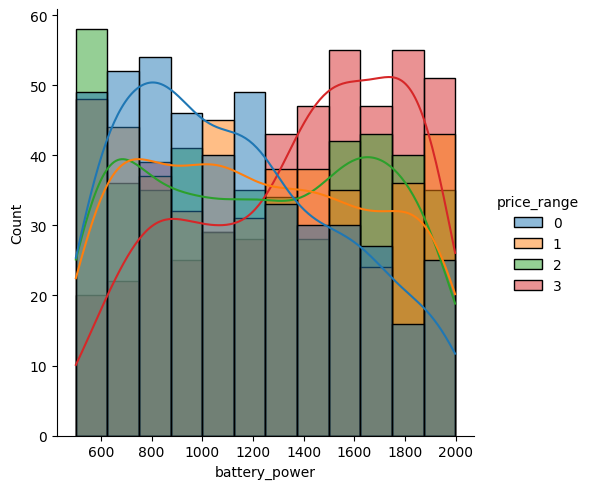

In [14]:
sns.displot(df, x='battery_power', hue='price_range', kde=True)

Данный график показывает, что для высокого ценового сегмента более характерны модели с высокой емкостью батареи, в то время как для низкого - низкой; в среднем же ценовом сегменте в равной мере представлены модели с различным объемом батареи. Это позволяет отметить данный признак как важный для дальнейшей классификации.

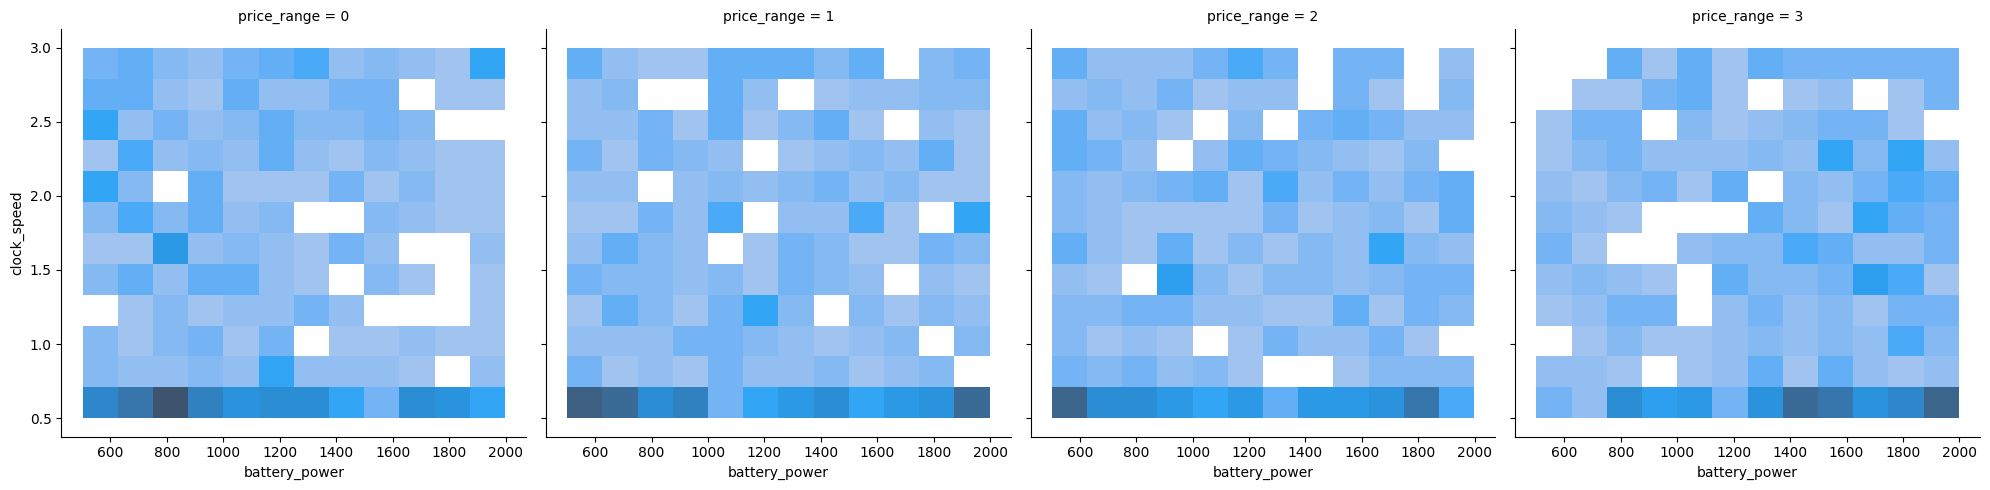

In [15]:
sns.displot(df, x='battery_power',y='clock_speed',col='price_range')

Данный график показывает не только факт того, что модели с низкой тактовой частотой процессора в равной степени преобладают во всех ценовых сегментах (что делает этот признак менее информативный для дальнейшей классификации), но и подтверждает низкую корреляцию между размером батареи и тактовой частотой.

## Histplot

<Axes: xlabel='price_range', ylabel='Count'>

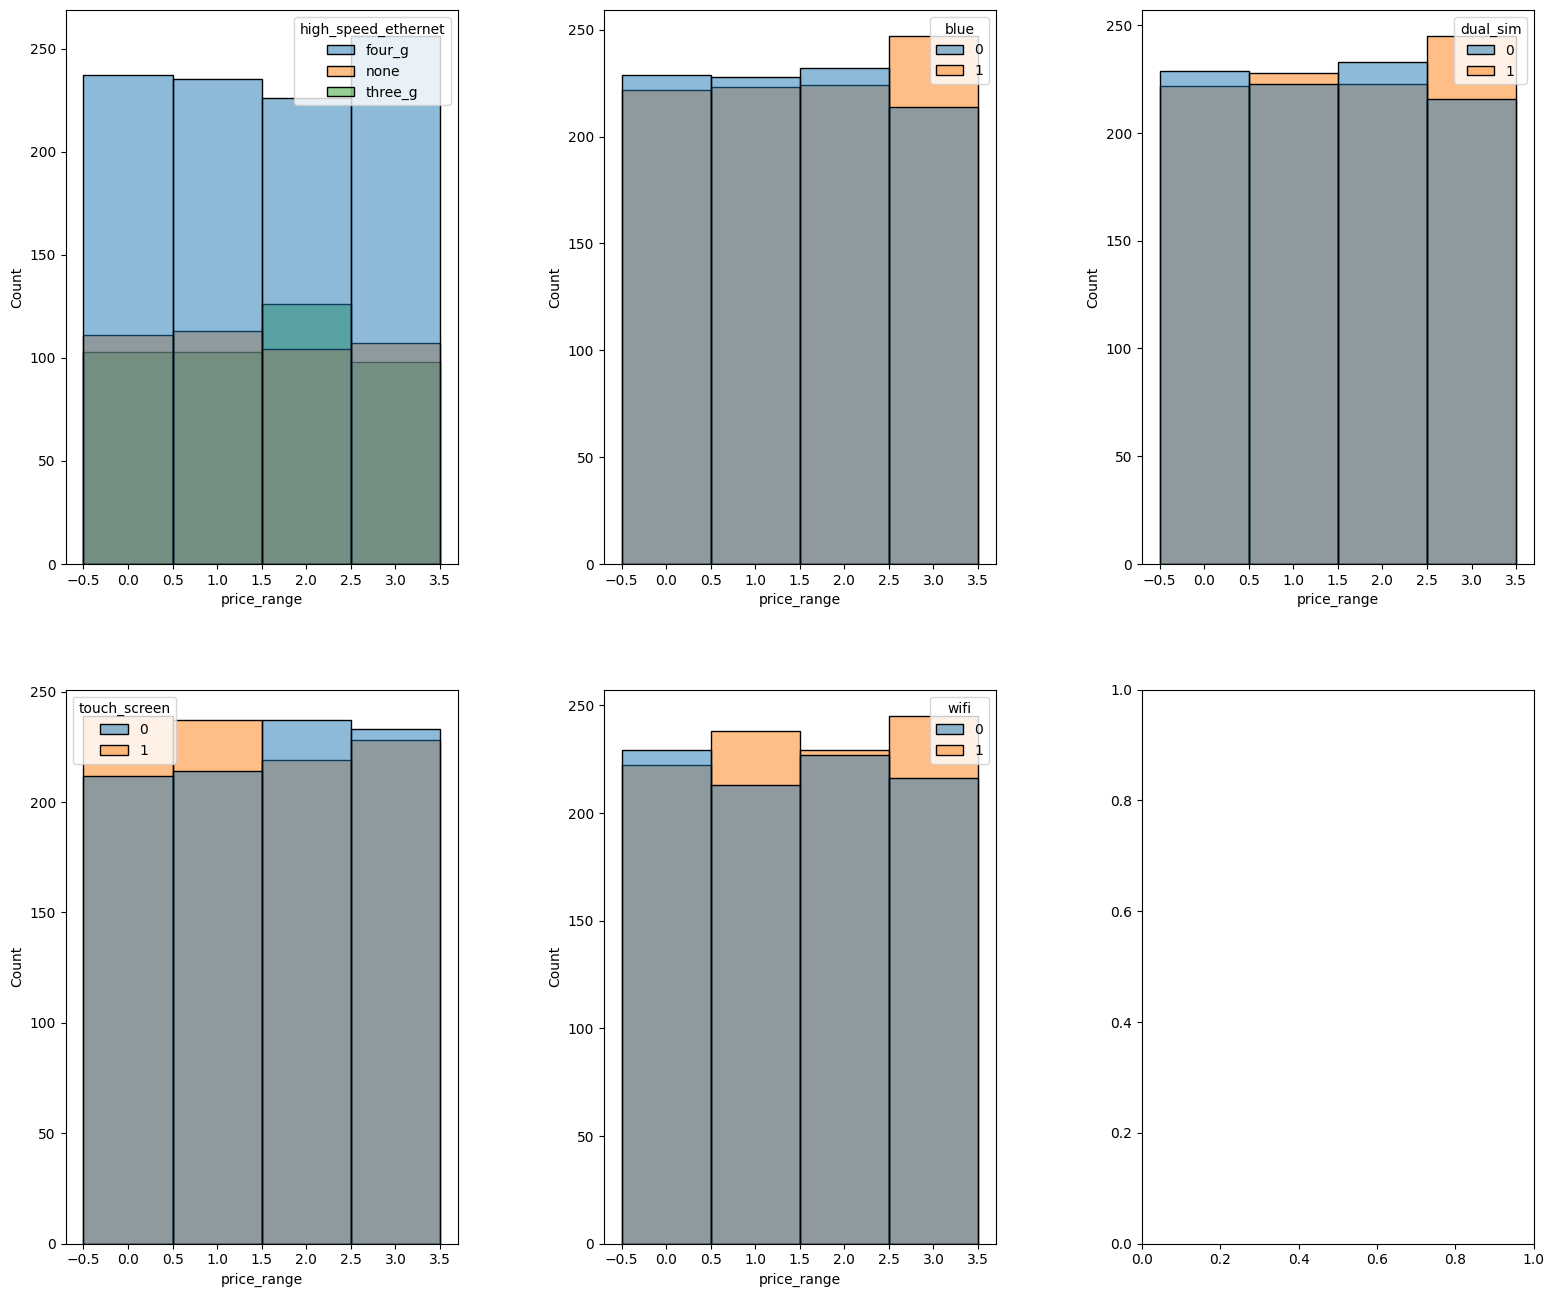

In [19]:
fig, axs = plt.pyplot.subplots(2,3)
fig.tight_layout(pad=1)
fig.set_size_inches(16.5, 14, forward=True)

sns.histplot(df, x = 'price_range', hue = 'high_speed_ethernet', ax=axs[0,0])
sns.histplot(df, x = 'price_range', hue = 'blue', ax=axs[0,1])
sns.histplot(df, x = 'price_range', hue = 'touch_screen', ax=axs[1,0])
sns.histplot(df, x = 'price_range', hue = 'wifi', ax=axs[1,1])
sns.histplot(df, x = 'price_range', hue = 'dual_sim', ax=axs[0,2])

Данный график показывает низкий уровень влияния особых функций связи (Bluetooth, 3g/4g интернет) и наличия сенсорного экрана или возможности установки двух сим-карт на категорию стоимости устройства.

## Scatterplot

In [ ]:
sns.scatterplot(df, x = 'ram', y = 'int_memory', hue = 'price_range')

Данный график позволяет визуализировать распределение моделей по условным ценовым классам на основе общей мощности. Можно обоснованно предположить, что с данной точки зрения классы хорошо сбалансированы, но имеют очень нечеткие границы.

In [17]:
df['high_speed_ethernet'] = df.apply(lambda x: 'four_g' if x['four_g'] == 1 \
                             else 'three_g' if x['three_g'] == 1 \
                             else 'none', axis = 1).astype('category') 

In [18]:
df['high_speed_ethernet'].value_counts()

high_speed_ethernet
four_g     954
none       435
three_g    430
Name: count, dtype: int64

<Axes: xlabel='ram', ylabel='int_memory'>

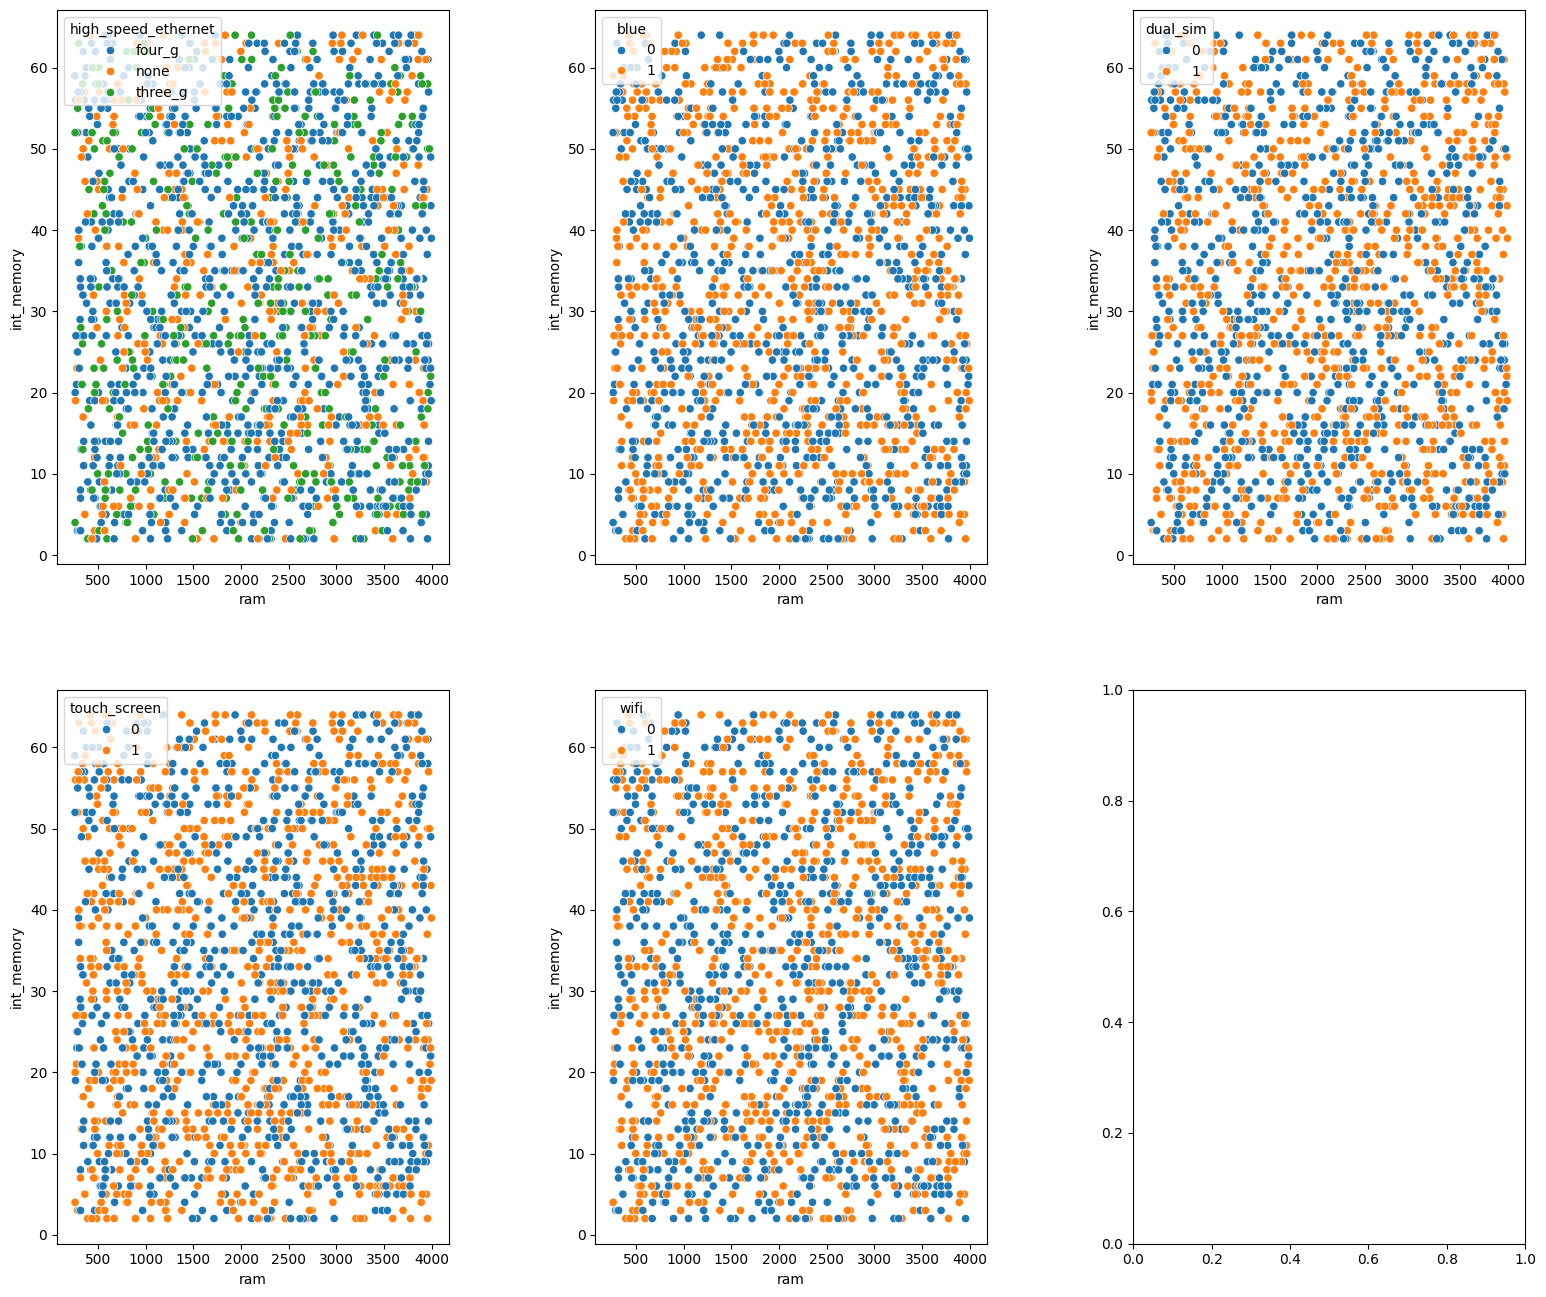

In [20]:
fig, axs = plt.pyplot.subplots(2,3)
fig.tight_layout(pad=1)
fig.set_size_inches(16.5, 14, forward=True)

sns.scatterplot(df, x = 'ram', y = 'int_memory', hue = 'high_speed_ethernet', ax=axs[0,0])
sns.scatterplot(df, x = 'ram', y = 'int_memory', hue = 'blue', ax=axs[0,1])
sns.scatterplot(df, x = 'ram', y = 'int_memory', hue = 'touch_screen', ax=axs[1,0])
sns.scatterplot(df, x = 'ram', y = 'int_memory', hue = 'wifi', ax=axs[1,1])
sns.scatterplot(df, x = 'ram', y = 'int_memory', hue = 'dual_sim', ax=axs[0,2])

Данный график показывает отсутствие влияния особых функций связи (Bluetooth, 3g/4g интернет) и наличия сенсорного экрана или возможности установки двух сим-карт на совокупную мощность устройства.

## Boken

In [ ]:
from bokeh.plotting import figure, show, output_file, save
from bokeh.models import ColumnDataSource,  HoverTool, Legend
from bokeh.transform import factor_cmap
from bokeh.io import output_notebook 
output_notebook()

Loading BokehJS ...

In [ ]:
df['screen_size'] = (df['sc_h']*df['sc_w']).astype('int16')

In [ ]:
types = df['price_range'].unique().astype(str).tolist()
df['price_range'] = df['price_range'].astype('str').astype('category')
source = ColumnDataSource(data=df.sample(frac=0.1))
p = figure(width=1000)
p.scatter(source=source, x='screen_size', y='battery_power', color=factor_cmap(field_name='price_range', palette='Category10_4', factors=types), legend_field='price_range')
hover = HoverTool(tooltips=[('battery power ', '@battery_power'),
                              ('price', '@price_range'),
                              ('screen size', '@screen_size')])

p.add_tools(hover)
show(p)



In [ ]:
output_file(filename='/home/mainuser/lab_project/eda/graph7.html',title='Static HTML graph file')

save(p)

'/home/mainuser/lab_project/eda/graph7.html'

Данный график показывает отсутствие зависимости между размером батареи и экрана у представленных моделей, а также тот факт, что в каждом ценовом сегменте равно представлены модели с различным размером экрана, что делает этот совокупный фактор также малоинформативным для классификации.

# Сохранение обработанного датасета

In [21]:
df.to_pickle('/home/mainuser/lab_project/data/clean_data.pkl')

# Выводы после EDA

- При очистке данных отсеяны некорректные параметры экранов.
- Создано два новых признака: high_speed_ethernet объединяет признаки three_g и four_g, поскольку фактически они зависимы (моделей с 4g, но без 3g быть не может), а screen_size является производным от физических размеров экрана для удобства оценки.
- Для последующей классификации может быть полезен фактор размера батареи, но малополезны факторы размера экрана и особых параметров связи.